# Prueba Python

Esta prueba nos ayudará a entender su conocimiento de programación en python para tareas analíticas. El objetivo es presentarle un escenario al que se enfrentaría en su día a día y validar como lo resuelve. Tiene 45 minutos para resolverlo.

## Datos:

El archivo CSV adjunto, contine información sobre prestamos hipotecarios. Para la prueba ustede deberá:
### 1. Cargar la fuente de datos a python ``` datasets_18290_23922_hmeq.csv```
### 2. Imprimir los primeros 10 registros de la tabla


In [6]:
import pandas as pd


df = pd.read_csv('datasets_18290_23922_hmeq.csv') # Se lee el archivo csv
df.head(10) # se imprimen los primeros 10 registros

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


### 3. Analice la calidad de datos de la tabla y concluya al respecto:

In [7]:
df.describe() # análisis estadístico inicial del dataset

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [8]:
df.dtypes  # se verifican los tipos de datos de cada columna del dataset

# Los valores numéricos son correctos, por lo tanto se puede realizar un reemplazo de los valores NaN por el promedio 
# de los datos restantes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

### 4. Genere una estrategia para mejorar la calidad de al menos dos de las columnas que usted desee.

In [10]:
# se buscan valores binarios
df_binario = df.isnull() # busca NaN en todo los registros 
df_binario.head()

# True -> el valor es NaN (hay que solucionar este problema)
# False -> el valor NO es NaN 

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True


In [12]:
# se recorren las columnas para saber cuantos valores son NaN en cada columna
columnas = df_binario.columns.values.tolist() # lista de las columnas del dataset
print(columnas)

['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [13]:
for columna in columnas:
    print(columna)
    print(df_binario[columna].value_counts())
    print("-----")

# se recorre cada columna en búsqueda de valores NaN (True)

BAD
False    5960
Name: BAD, dtype: int64
-----
LOAN
False    5960
Name: LOAN, dtype: int64
-----
MORTDUE
False    5442
True      518
Name: MORTDUE, dtype: int64
-----
VALUE
False    5848
True      112
Name: VALUE, dtype: int64
-----
REASON
False    5708
True      252
Name: REASON, dtype: int64
-----
JOB
False    5681
True      279
Name: JOB, dtype: int64
-----
YOJ
False    5445
True      515
Name: YOJ, dtype: int64
-----
DEROG
False    5252
True      708
Name: DEROG, dtype: int64
-----
DELINQ
False    5380
True      580
Name: DELINQ, dtype: int64
-----
CLAGE
False    5652
True      308
Name: CLAGE, dtype: int64
-----
NINQ
False    5450
True      510
Name: NINQ, dtype: int64
-----
CLNO
False    5738
True      222
Name: CLNO, dtype: int64
-----
DEBTINC
False    4693
True     1267
Name: DEBTINC, dtype: int64
-----


In [38]:
# la columna DEBTINC presenta una gran cantidad de NaN
# se reemplazan por el valor promedio (existen otras maneras de realizar el reemplazo)
promedio_DEBTINC = df['DEBTINC'].mean(axis = 0)
print("El promedio de DEBTINC es: ", promedio_DEBTINC)

El promedio de DEBTINC es:  33.772840355291244


In [20]:
# se reemplazan estos registros 
import numpy as np
df.replace(np.nan, promedio_DEBTINC, inplace = True) #Reemplazo NaN por el promedio calculado


33.779915    1267
39.791199       1
35.598951       1
39.918790       1
30.857067       1
             ... 
24.187934       1
29.633608       1
30.553005       1
38.682676       1
36.010892       1
Name: DEBTINC, Length: 4694, dtype: int64


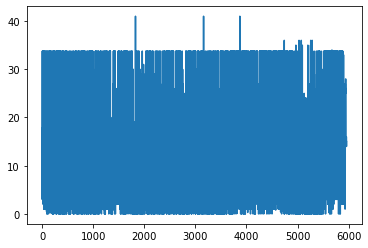

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 
# el valor máximo de YOJ está  por encima del promedio, conviene eliminarlo al ser un posible "outlier"
df['YOJ'].plot()# la gráfica permite analizar la presencia de valores fuera de rango (outliers)

In [23]:

# al ver la gráfica se encuentran 3 outliers. Estos se eliminan

df = df[df['YOJ'] <= 35] # límite de 35

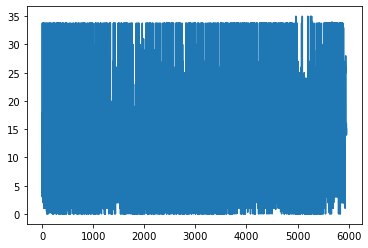

In [24]:
df['YOJ'].plot() # outliers eliminados


Como Organización, queremos calcular la probabilidad de que un cliente que teng auna hipotéca caiga en Default. Nos interesa entonces construir un modelo que permita 'predecir' el valor de la variable 'BAD'.
### 5. ¿Qué Estrategias usaría para lograr este objetivo? Diuscuta

'''

A primera vista, al ser la salida de tipo binaria, resulta conveniente evaluar el desempeño del modelo
haciendo uso de una regresión líneal múltiple. En caso de obtener malas predicciones, puede pasarse a 
modelos más elaborados como regresiones polinomiales. 

Resulta conveniente realizar análisis de correlación entre las variables para saber si es posible eliminar una
de las 2 al tener éstas una alta correlación.

La mejora del modelo puede requerir regresar a etapas previas, donde puede ser necesario realizar una mejor
preparación de los datos, solucionar el problema de los NaN que aún están presentes o calcular escalado de los
datos mediante normalizaciones.



'''

### 6. Construya el modelo que propuso. Valide los supuestos de su modelo previa construcción:

In [25]:
# Se decide construir una regresión lineal múltiple, es el modelo más sencillo y a primera vista 
# no se sabe si pueda ser o no suficiente. Es necesario tener conocimiento de dominio del problema
# para poder tomar mejores decisiones

from sklearn.linear_model import LinearRegression

In [27]:
regresion = LinearRegression() # se crea el objeto

In [28]:
#variables predictoras

predictoras = df[['LOAN','VALUE','DEROG','']] # pueden elegirse más o menos variables predictoras dependiendo de los resultados
regresion.fit(predictoras, df['BAD'])



LinearRegression()

In [29]:
BAD_predecido = regresion.predict(predictoras)

In [30]:
BAD_predecido[:5]

array([0.27419088, 0.25887598, 0.28473783, 0.21844015, 0.23594062])

In [32]:
len(BAD_predecido)

5952

In [34]:
#el error cuadrático medio evalua:
#(Yreal- Y predecido)^2

BAD_real = df['BAD']
    

In [35]:
error = (BAD_real-BAD_predecido)*(BAD_real-BAD_predecido)

In [37]:
print(f'El error de generalización del modelo es: {sum(error)}')

El error de generalización del modelo es: 936.4814636595953


In [ ]:
# Se observa que el error es muy alto. Hay que tener en cuenta que éste es acumulativo,
# por lo tanto conviene disminuirlo